sources:

* https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/modern_nlp_in_python.ipynb
* https://spacy.io/usage/
* https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb

<img src='imgs/spacy.png' />

spaCy is an industrial-strength natural language processing (NLP) library for Python. spaCy's goal is to take recent advancements in natural language processing out of research papers and put them in the hands of users to build production software.

spaCy handles many tasks commonly associated with building an end-to-end natural language processing pipeline:

* Tokenization
* Text normalization, such as lowercasing, stemming/lemmatization
* Part-of-speech tagging
* Syntactic dependency parsing
* Sentence boundary detection
* Named entity recognition and annotation
    
In the "batteries included" Python tradition, spaCy contains built-in data and models which you can use out-of-the-box for processing general-purpose English language text:

* Large English vocabulary, including stopword lists
* Token "probabilities"
* Word vectors
    
spaCy is written in optimized Cython, which means it's fast. According to a few independent sources, it's the fastest syntactic parser available in any language. Key pieces of the spaCy parsing pipeline are written in pure C, enabling efficient multithreading (i.e., spaCy can release the GIL).

In [399]:
import spacy
from spacy import displacy
from itertools import islice
%run script.py
%matplotlib inline
import numpy as np

nlp = spacy.load('en')

In [400]:
nyt = nlp("""Sure, we all wish that Trump treated Justin Trudeau or Angela Merkel with the respect that he now shows Kim Jong-un. Yes, it seems that Trump has been played by Kim. Yet another way of putting it is that Trump is finally investing in the kind of diplomatic engagement that he used to denounce, and that we should all applaud.

Trump’s newfound pragmatism is infinitely preferable to the threat of nuclear war that used to hang over all of us, so it’s mystifying to see Democrats carping about any possible North Korea deal.""")
nyt

Sure, we all wish that Trump treated Justin Trudeau or Angela Merkel with the respect that he now shows Kim Jong-un. Yes, it seems that Trump has been played by Kim. Yet another way of putting it is that Trump is finally investing in the kind of diplomatic engagement that he used to denounce, and that we should all applaud.

Trump’s newfound pragmatism is infinitely preferable to the threat of nuclear war that used to hang over all of us, so it’s mystifying to see Democrats carping about any possible North Korea deal.

# tokenization

nlp.Defaults.tokenizer_exceptions

In [401]:
for i, s in islice(enumerate(nyt), 10):
    print(i, s)
    print()

0 Sure

1 ,

2 we

3 all

4 wish

5 that

6 Trump

7 treated

8 Justin

9 Trudeau



# sentence segmentation

In [402]:
for i, s in islice(enumerate(nyt.sents), 5):
    print(i, s)
    print()

0 Sure, we all wish that Trump treated Justin Trudeau or Angela Merkel with the respect that he now shows Kim Jong-un.

1 Yes, it seems that Trump has been played by Kim.

2 Yet another way of putting it is that Trump is finally investing in the kind of diplomatic engagement that he used to denounce, and that we should all applaud.



3 Trump’s newfound pragmatism is infinitely preferable to the threat of nuclear war that used to hang over all of us, so it’s mystifying to see Democrats carping about any possible North Korea deal.



# noun chunks

In [403]:
for i, s in islice(enumerate(nyt.noun_chunks), 5):
    print(i, s)
    print()

0 we

1 Trump

2 Justin Trudeau

3 Angela Merkel

4 the respect



# Part Of Speech

word function inside a sentence

In [404]:
trudeau = nyt[9]
trudeau

Trudeau

In [405]:
trudeau.pos_, POS_TAGS[trudeau.pos_]

('PROPN', 'proper noun')

# dependency relation

In [406]:
trudeau.dep_, DEP_TAGS[trudeau.dep_]

('dobj', 'Direct Object')

In [407]:
sen1_as_doc = next(nyt.sents).as_doc()

displacy.render(sen1_as_doc, style='dep', jupyter=True)

# lemmatization

In [408]:
treated = nyt[7]
treated

treated

In [409]:
treated.lemma_

'treat'

# shape

In [410]:
trudeau.shape_

'Xxxxx'

# is alpha

In [411]:
trudeau.is_alpha

True

# stopword

very frequent words that carry only a tiny part of sentence's information

nlp.Defaults.stop_words

In [412]:
that = nyt[5]
trudeau.is_stop, that.is_stop

(False, True)

# named entity recognition

In [413]:
for i, s in enumerate(nyt.ents):
    print(i, s)
    print()

0 Trump

1 Justin Trudeau

2 Angela Merkel

3 Kim Jong-un

4 Trump

5 Kim

6 Trump

7 Trump’s

8 Democrats

9 North Korea



In [414]:
displacy.render(nyt, style='ent', jupyter=True)

# to DataFrame

In [415]:
doc_to_df(nyt).head(10)

,Text,POS,Dep,Tag,Shape,Alpha,Stop,Head,Left,Right,Entity,EntIOB,Lemma
0,Sure,interjection,intj,UH,Xxxx,X,--,wish,Sure,Sure,,O,sure
1,",",punctuation,punct,",",",",--,--,wish,",",",",,O,","
2,we,pronoun,nsubj,PRP,xx,X,X,wish,we,all,,O,-PRON-
3,all,determiner,appos,DT,xxx,X,X,we,all,all,,O,all
4,wish,verb,ROOT,VBP,xxxx,X,--,wish,Sure,.,,O,wish
5,that,adposition,mark,IN,xxxx,X,X,treated,that,that,,O,that
6,Trump,proper noun,nsubj,NNP,Xxxxx,X,--,treated,Trump,Trump,ORG,B,trump
7,treated,verb,ccomp,VBD,xxxx,X,--,wish,that,un,,O,treat
8,Justin,proper noun,compound,NNP,Xxxxx,X,--,Trudeau,Justin,Justin,PERSON,B,justin
9,Trudeau,proper noun,dobj,NNP,Xxxxx,X,--,treated,Justin,Merkel,PERSON,I,trudeau


# word vector

In [416]:
doc = nlp('Paris Brazil mango apple')

from itertools import product
import numpy as np

pd.DataFrame(np.array([w1.similarity(w2) for w1, w2 in product(doc, doc)]).reshape((4, 4)), index=doc, columns=doc)

,Paris,Brazil,mango,apple
Paris,1.000000,0.436625,0.276051,0.062527
Brazil,0.436625,1.000000,0.315326,-0.039096
mango,0.276051,0.315326,1.000000,0.400696
apple,0.062527,-0.039096,0.400696,1.000000


# example

In [417]:
nlp = spacy.load('en_core_web_lg')

In [418]:
with open('data/pg50133 - cleaned.txt') as f:
    
    # https://chartbeat-labs.github.io/textacy/api_reference.html#textacy.preprocess.normalize_whitespace
    hp = nlp(f.read().replace('\n', ' '))

In [419]:
hp[:100]

﻿"Gorgons, and Hydras, and Chimeras,dire stories of Celæno and the Harpies,may reproduce themselves in the brain of superstition, but they were there before. They are transcripts, types, the archetypes are in us, and eternal. How else should the recital of that which we know in a waking sense to be false come to affect us at all? Is it that we naturally conceive terror from such objects, considered in their capacity of being able to inflict upon us bodily injury? Oh, least of all

In [420]:
for i, s in enumerate(islice(hp.sents, 5)):
    print(i, s)
    print()

0 ﻿"Gorgons, and Hydras, and Chimeras,dire stories of Celæno and the Harpies,may reproduce themselves in the brain of superstition, but they were there before.

1 They are transcripts, types, the archetypes are in us, and eternal.

2 How else should the recital of that which we know in a waking sense to be false come to affect us at all?

3 Is it that we naturally conceive terror from such objects, considered in their capacity of being able to inflict upon us bodily injury?

4 Oh, least of all!



# sentence len statistics

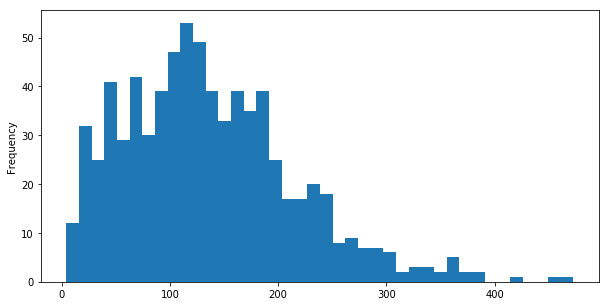

In [421]:
pd.Series((len(sent.string) for sent in hp.sents)).plot.hist(bins=40, figsize=(10, 5))

In [422]:
hp_df = doc_to_df(hp)
hp_df.head(10)

,Text,POS,Dep,Tag,Shape,Alpha,Stop,Head,Left,Right,Entity,EntIOB,Lemma
0,"﻿""Gorgons",noun,nsubj,NNS,"﻿""Xxxxx",--,--,reproduce,"﻿""Gorgons",",",,O,"﻿""gorgon"
1,",",punctuation,punct,",",",",--,--,"﻿""Gorgons",",",",",,O,","
2,and,coordinating conjunction,cc,CC,xxx,X,--,"﻿""Gorgons",and,and,,O,and
3,Hydras,proper noun,conj,NNPS,Xxxxx,X,--,"﻿""Gorgons",Hydras,",",ORG,B,hydras
4,",",punctuation,punct,",",",",--,--,Hydras,",",",",,O,","
5,and,coordinating conjunction,cc,CC,xxx,X,--,Hydras,and,and,,O,and
6,Chimeras,proper noun,conj,NNPS,Xxxxx,X,--,Hydras,Chimeras,",",PRODUCT,B,chimeras
7,",",punctuation,punct,",",",",--,--,Chimeras,",",",",,O,","
8,dire,adjective,amod,JJ,xxxx,X,--,stories,dire,dire,,O,dire
9,stories,noun,appos,NNS,xxxx,X,--,Chimeras,dire,Harpies,,O,story


# most frequent entities

In [423]:
hp_df[hp_df.Entity != ''].Text.value_counts().head()

Whateley    73
Armitage    52
Wilbur      48
the         40
Dunwich     36
Name: Text, dtype: int64

# example of sentence annotated with entities

In [424]:
displacy.render(next(hp.sents).as_doc(), style='ent', jupyter=True)

# frequency per POS

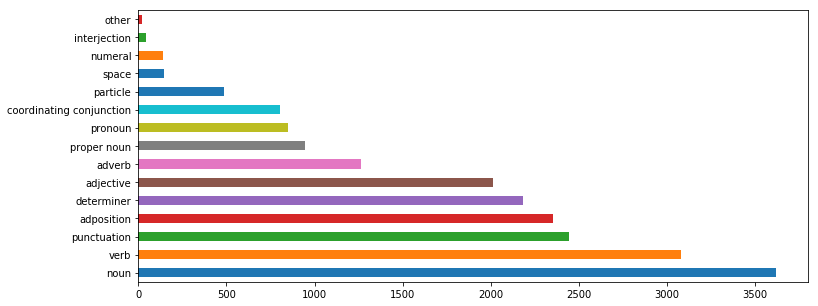

In [425]:
hp_df.POS.value_counts().plot.barh(figsize=(12, 5))

# top 3 frequent lemmas per POS

In [426]:
hp_df.groupby('POS').apply(lambda g: g.Lemma.value_counts().nlargest(5))

POS                               
adjective                 -PRON-       246
                          which         87
                          that          62
                          old           37
                          great         35
adposition                of           616
                          in           277
                          to           146
                          as           121
                          with         117
adverb                    not           98
                          when          61
                          there         55
                          only          53
                          then          37
coordinating conjunction  and          608
                          but           97
                          or            71
                          yet           11
                          nor           11
determiner                the         1298
                          a            402
                   

In [427]:
# https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb
# adapted
def locations(test_condition, haystack): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if test_condition(word)], bins=30)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89dd2f7278>,
      dtype=object)

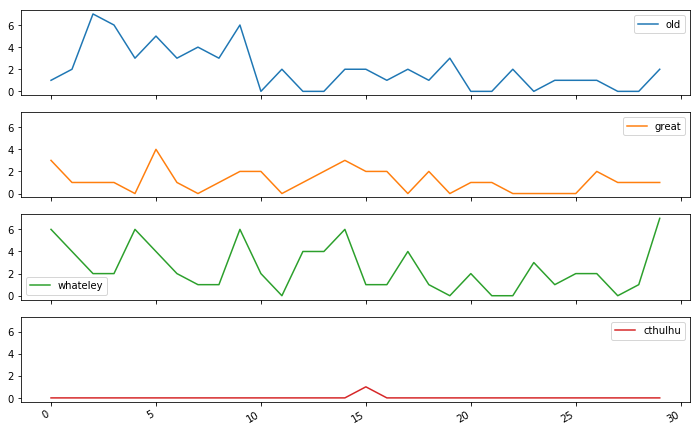

In [428]:
pd.DataFrame(
    {lemma: locations(lambda word: word.lemma_ == lemma, hp) 
     for lemma in ['old', 'great', 'whateley', 'cthulhu']}
).plot(subplots=True, figsize=(12, 8), sharey=True)

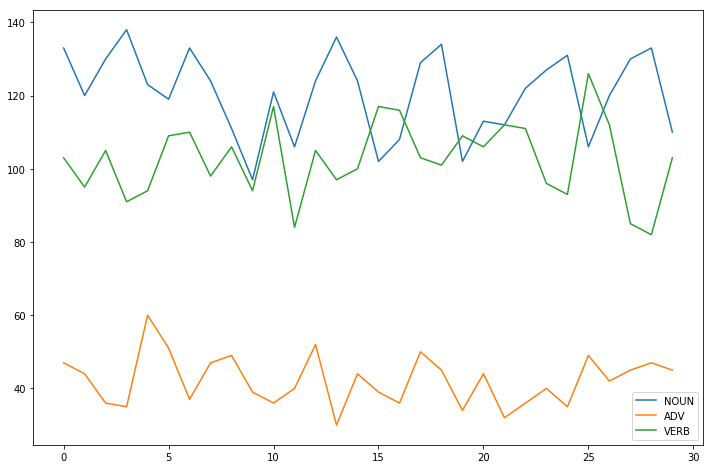

In [429]:
pd.DataFrame(
    {pos: locations(lambda word: word.pos_ == pos, hp) 
     for pos in ['NOUN', 'ADV', 'VERB']}
).plot(figsize=(12, 8), sharey=True)

# adjectives frequency per dependency head

In [430]:
# normalmente a palavra a qual o adjetivo se refere aparece como head na dependency tree
head_of_adj = hp_df[hp_df.POS == 'adjective'].groupby('Head').Lemma.value_counts().unstack().fillna(0)
head_of_adj.head(10)

Lemma,-PRON-,able,abnormal,about,absurd,accurate,accursed,acoustic,actual,acute,...,worried,worthy,wrong,wun't,wust,yellow,yellowish,young,youngish,youthful
Head,,,,,,,,,,,,,,,,,,,,,
're,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alhazred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armitage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bishop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bishops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
m_w = head_of_adj.loc[['books', 'eyes', 'face', 'Whateley']].T
m_w[m_w.sum(axis=1) > 0]

Head,books,eyes,face,Whateley
Lemma,,,,
-PRON-,1.0,3.0,1.0,0.0
all,1.0,0.0,0.0,0.0
ancient,2.0,0.0,0.0,0.0
bearded,0.0,0.0,1.0,0.0
black,0.0,1.0,0.0,1.0
chinless,0.0,0.0,1.0,0.0
dark,0.0,1.0,0.0,0.0
dim,0.0,0.0,0.0,1.0
goatish,0.0,0.0,2.0,0.0


# Textacy

https://chartbeat-labs.github.io/textacy/index.html

In [432]:
import textacy

## preprocess_text

Warning! These changes may negatively affect subsequent NLP analysis performed on the text, so choose carefully, and preprocess at your own risk!

In [433]:
s = """A UFC, Universidade Federal do Ceará, receberá inscrições, no período de 29 de junho a 8 de julho, através do site da Coordenadoria de Concursos (CCV)(http://www.ccv.ufc.br/), para a seleção ao semestre I dos cursos de idiomas das Casas de Cultura Estrangeira. Para mais informações: ccv@ufc.br"""
ss = s.encode('utf-8').decode('iso-8859-1', errors='replace')
ss

'A UFC, Universidade Federal do CearÃ¡, receberÃ¡ inscriÃ§Ãµes, no perÃ\xadodo de 29 de junho a 8 de julho, atravÃ©s do site da Coordenadoria de Concursos (CCV)(http://www.ccv.ufc.br/), para a seleÃ§Ã£o ao semestre I dos cursos de idiomas das Casas de Cultura Estrangeira. Para mais informaÃ§Ãµes: ccv@ufc.br'

## fix_unicode

if True, fix “broken” unicode such as mojibake and garbled HTML entities

In [434]:
textacy.preprocess_text(ss,
                        fix_unicode=True, 
                        lowercase=False, 
                        transliterate=False, 
                        no_urls=False, 
                        no_emails=False, 
                        no_phone_numbers=False, 
                        no_numbers=False, 
                        no_currency_symbols=False, 
                        no_punct=False, 
                        no_contractions=False, 
                        no_accents=False)

'A UFC, Universidade Federal do Ceará, receberá inscrições, no período de 29 de junho a 8 de julho, através do site da Coordenadoria de Concursos (CCV)(http://www.ccv.ufc.br/), para a seleção ao semestre I dos cursos de idiomas das Casas de Cultura Estrangeira. Para mais informações: ccv@ufc.br'

## lowercase

if True, all text is lower-cased

In [435]:
textacy.preprocess_text(ss,
                        fix_unicode=True, 
                        lowercase=True, 
                        transliterate=False, 
                        no_urls=False, 
                        no_emails=False, 
                        no_phone_numbers=False, 
                        no_numbers=False, 
                        no_currency_symbols=False, 
                        no_punct=False, 
                        no_contractions=False, 
                        no_accents=False)

'a ufc, universidade federal do ceará, receberá inscrições, no período de 29 de junho a 8 de julho, através do site da coordenadoria de concursos (ccv)(http://www.ccv.ufc.br/), para a seleção ao semestre i dos cursos de idiomas das casas de cultura estrangeira. para mais informações: ccv@ufc.br'

## transliterate

if True, convert non-ascii characters into their closest ascii equivalents

In [436]:
textacy.preprocess_text(ss,
                        fix_unicode=True, 
                        lowercase=True, 
                        transliterate=True, 
                        no_urls=False, 
                        no_emails=False, 
                        no_phone_numbers=False, 
                        no_numbers=False, 
                        no_currency_symbols=False, 
                        no_punct=False, 
                        no_contractions=False, 
                        no_accents=False)

'a ufc, universidade federal do ceara, recebera inscricoes, no periodo de 29 de junho a 8 de julho, atraves do site da coordenadoria de concursos (ccv)(http://www.ccv.ufc.br/), para a selecao ao semestre i dos cursos de idiomas das casas de cultura estrangeira. para mais informacoes: ccv@ufc.br'

## no_urls, no_emails, no_punct etc

In [437]:
textacy.preprocess_text(ss,
                        fix_unicode=True, 
                        lowercase=True, 
                        transliterate=True, 
                        no_urls=True, 
                        no_emails=True, 
                        no_phone_numbers=True, 
                        no_numbers=False, 
                        no_currency_symbols=True, 
                        no_punct=True, 
                        no_contractions=False, 
                        no_accents=False)

'a ufc universidade federal do ceara recebera inscricoes no periodo de 29 de junho a 8 de julho atraves do site da coordenadoria de concursos ccv url para a selecao ao semestre i dos cursos de idiomas das casas de cultura estrangeira para mais informacoes email'

# Doc

In [438]:
# autodetect language
doc = textacy.Doc(s)
doc

Doc(55 tokens; "A UFC, Universidade Federal do Ceará, receberá ...")

In [439]:
doc.lang

'pt'

In [440]:
textacy.text_utils.detect_language("I'm brazilian"),\
textacy.text_utils.detect_language("Eu sou brasileiro")

('en', 'pt')

# bag_of_words, bag_of_terms

In [441]:
doc.to_bag_of_terms(as_strings=True, normalize='lemma', ngrams=(1, 2), weighting='freq')

{'UFC': 0.01818181818181818,
 'Universidade Federal do Ceará': 0.01818181818181818,
 'Coordenadoria de Concursos': 0.01818181818181818,
 'I': 0.01818181818181818,
 'Casas de Cultura Estrangeira': 0.01818181818181818,
 'A': 0.01818181818181818,
 'Universidade': 0.01818181818181818,
 'Federal': 0.01818181818181818,
 'Ceará': 0.01818181818181818,
 'receber': 0.01818181818181818,
 'inscrição': 0.01818181818181818,
 'período': 0.01818181818181818,
 '29': 0.01818181818181818,
 'junho': 0.01818181818181818,
 'o': 0.07272727272727272,
 '8': 0.01818181818181818,
 'julho': 0.01818181818181818,
 'site': 0.01818181818181818,
 'Coordenadoria': 0.01818181818181818,
 'Concursos': 0.01818181818181818,
 'CCV)(http://www.ccv.ufc.br/': 0.01818181818181818,
 'seleção': 0.01818181818181818,
 'semestre': 0.01818181818181818,
 'curso': 0.01818181818181818,
 'idioma': 0.01818181818181818,
 'Casas': 0.01818181818181818,
 'Cultura': 0.01818181818181818,
 'Estrangeira': 0.01818181818181818,
 'Para': 0.0181818181

## acronyms_and_definitions

In [442]:
doc[:15]

A UFC, Universidade Federal do Ceará, receberá inscrições, no período de 29

In [443]:
textacy.extract.acronyms_and_definitions(doc)

{'UFC': 'Universidade Federal do Ceará'}

## ngrams

In [444]:
list(textacy.extract.ngrams(doc, 2, filter_stops=True, filter_nums=True, filter_punct=True))

[A UFC,
 Universidade Federal,
 receberá inscrições,
 junho a,
 a seleção,
 seleção a,
 ao,
 o semestre,
 semestre I,
 Cultura Estrangeira]

## Subject Verb Object triples

In [445]:
list(textacy.extract.subject_verb_object_triples(textacy.Doc('I am a student. I am a IT analyst')))

[(I, am, student), (I, am, IT analyst)]

# keywords in context

In [446]:
textacy.text_utils.keyword_in_context(text=s, keyword='UFC', window_width=40)

                                      A  UFC , Universidade Federal do Ceará, receber
doria de Concursos (CCV)(http://www.ccv. ufc .br/), para a seleção ao semestre I dos 
Estrangeira. Para mais informações: ccv@ ufc .br                                     


# main verb

In [447]:
textacy.spacy_utils.get_main_verbs_of_sent(nlp('I was reading a book'))

[reading]

# objects of a verb

In [448]:
doc = nlp('I have not been drinking wine and vodkas')
drinking = doc[4]

textacy.spacy_utils.get_objects_of_verb(drinking)

[wine, vodkas]

# span for verb auxiliares

In [449]:
doc[slice(*textacy.spacy_utils.get_span_for_verb_auxiliaries(drinking))]

have not been

## subject of verb

In [450]:
textacy.spacy_utils.get_subjects_of_verb(drinking)

[I]

# is negated verb

In [451]:
textacy.spacy_utils.is_negated_verb(drinking)

True

## is plural noun

In [452]:
vodka = doc[-1]

textacy.spacy_utils.is_plural_noun(vodka)

True

## hamming distance

(...) which simply gives the number of characters in the strings that are different i.e. the number of substitution edits needed to change one string into the other.

In [453]:
textacy.similarity.hamming('Abelardo', 'Aberlado'),\
textacy.similarity.hamming('Abelardo', 'Odraleba'),\
textacy.similarity.hamming('Abelardo', 'Abelardo')

(0.625, 0.0, 1.0)

# jaccard similarity

Measure the semantic similarity between two strings or sequences of strings using Jaccard distance, with optional fuzzy matching of not-identical pairs when obj1 and obj2 are sequences of strings.

In [454]:
# 3(Abelardo, Aberlado, Vieira)/5(all words)
textacy.similarity.jaccard(['Abelardo', 'Vieira', 'Mota'], ['Aberlado', 'Vieira', 'Lovecraft'], 
                           fuzzy_match=True, match_threshold=0.8)

0.6

# jaro winkler similarity

Measure the similarity between two strings using Jaro-Winkler similarity metric, a modification of Jaro metric giving more weight to a shared prefix.

In [455]:
textacy.similarity.jaro_winkler('Abelardo', 'Aberlado'),\
textacy.similarity.jaro_winkler('Abelardo', 'Odraleba'),\
textacy.similarity.jaro_winkler('Abelardo', 'Abelardo')

(0.95625, 0.5, 1.0)

## levenshtein

minimum number of character insertions, deletions, and substitutions needed to change one string into the other.

In [456]:
textacy.similarity.levenshtein('Abelardo', 'Aberlado'),\
textacy.similarity.levenshtein('Abelardo', 'Odraleba'),\
textacy.similarity.levenshtein('Abelardo', 'Abelardo')

(0.75, 0.0, 1.0)

## word2vec

In [457]:
textacy.similarity.word2vec(nlp('Paris'), nlp('banana'))

0.15116550765673847

In [458]:
textacy.similarity.word2vec(nlp('Paris'), nlp('Brazil'))

0.48549856305475964

# Text statistics

In [459]:
hp_stats = textacy.text_stats.TextStats(hp)

hp_stats.basic_counts

{'n_sents': 740,
 'n_words': 17785,
 'n_chars': 80586,
 'n_syllables': 24030,
 'n_unique_words': 3965,
 'n_long_words': 3406,
 'n_monosyllable_words': 13260,
 'n_polysyllable_words': 1288}

In [460]:
hp_stats.readability_stats

{'flesch_kincaid_grade_level': 9.726611155012197,
 'flesch_reading_ease': 68.1343839042163,
 'smog_index': 10.66590028888882,
 'gunning_fog_index': 12.510336679102494,
 'coleman_liau_index': 9.610446238178241,
 'automated_readability_index': 11.928475248653207,
 'lix': 43.184753702254405,
 'gulpease_index': 56.17121169524881,
 'wiener_sachtextformel': 4.590646849379601}